#### _Matin's Lab Rotation 3 - BFCO_ | [PREVIOUS](02_consortia_model.ipynb)
# 05. Test dFBA

In [1]:
import mmodes

In [2]:
cons = mmodes.Consortium(stcut = 1e-7, 
                         mets_to_plot = ["ac_e", "glc__D_e"], 
                         v = 1, 
                         manifest = "COMETS_manifest.txt"
                        )

path_to_model = 'result/iML1515_isobutyric_strain.xml' 
path_to_model = 'result/iML1515_xylitol_strain.xml' 


glc = mmodes.dMetabolite(id = "glc__D_e", Km = 1480., Vmax = 13.)

cons.add_model(path_to_model, 0.01, solver = "gurobi", method = "fba", dMets = {glc.id: glc})
cons.add_model(path_to_model, 0.02, solver = "gurobi", method = "fba", dMets = {glc.id: glc})

Using license file /home/matinnu/gurobi.lic
Academic license - for non-commercial use only


In [3]:
abs_media = {k: 1000.0 for k in cons.media}
cons.media = cons.set_media(abs_media)

#print(cons)
cons.media["glc__D_e"] = 500.0
cons.media["xyl__D_e"] = 500.0
cons.media["ac_e"] = 10.0


Running... [########------------] 41.00%

/home/matinnu/anaconda3/envs/lab_rotation_3/lib/python3.7/site-packages/cobra/util/solver.py:430: UserWarning: solver status is 'infeasible'
  warn("solver status is '{}'".format(status), UserWarning)


Running... [########------------] 42.00%
Stationary state has been reached.

iML1515 -> 4.26746134698064
iML1515_1 -> 9.143434539546853
Glucose -> 208.9567329082888
Acetate -> 19.601744331863355



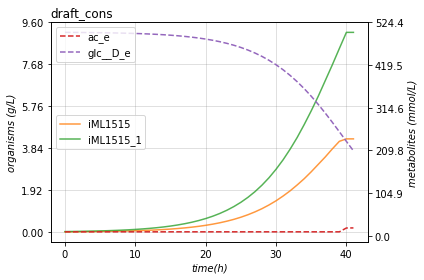

In [4]:
cons.run(maxT = 100, 
         outp = "plot_dFBA_test1.png", 
         outf = "tab_dFBA_test1.tsv", 
         verbose=True, 
         integrator = "fea", 
         stepChoiceLevel = (1.0,500.0,10000)
        )

# 6) print stuff on screen
for mod in cons.models:
    print(mod, cons.models[mod].volume.q, sep = " -> ")
print("Glucose", str(cons.media["glc__D_e"]), sep = " -> ")
print("Acetate", str(cons.media["ac_e"]), sep = " -> ")
print()